In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score,f1_score,confusion_matrix
# Show plots in notebook
%matplotlib inline 
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv('loans_full_schema.csv')

In [3]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [4]:
info = pd.DataFrame({
    "Column Name": df.columns,
    "Non-Null Count": df.count().values,  
    "Data Type": df.dtypes.values
})
info

,Column Name,Non-Null Count,Data Type
0,emp_title,9167,object
1,emp_length,9183,float64
2,state,10000,object
3,homeownership,10000,object
4,annual_income,10000,float64
5,verified_income,10000,object
6,debt_to_income,9976,float64
7,annual_income_joint,1495,float64
8,verification_income_joint,1455,object
9,debt_to_income_joint,1495,float64


In [5]:
columns = pd.DataFrame({"":'','Columns':df.columns})
columns.set_index("",inplace=True)
columns

,Columns
,
,emp_title
,emp_length
,state
,homeownership
,annual_income
,verified_income
,debt_to_income
,annual_income_joint
,verification_income_joint


In [6]:
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [9]:
df = df.drop(columns={'annual_income_joint','verification_income_joint','debt_to_income_joint','months_since_90d_late','num_accounts_120d_past_due'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   delinq_2y                         10000 non-null  int64  
 8   months_since_last_delinq          4342 non-null   float64
 9   earliest_credit_line              10000 non-null  int64  
 10  inquiries_last_12m                10000 non-null  int64  
 11  total_credit_lines                10000 non-null  int64  
 12  open_

In [10]:
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1271
num_satisfactory_accounts              0
num_accounts_30d_past_due              0
num_active_debit

In [11]:
df[['emp_title','emp_length']].head(10)

,emp_title,emp_length
0,global config engineer,3.0
1,warehouse office clerk,10.0
2,assembly,3.0
3,customer service,1.0
4,security supervisor,10.0
5,NaN,NaN
6,hr,10.0
7,police,10.0
8,parts,10.0
9,4th person,3.0


In [12]:
df['emp_title'] = df['emp_title'].fillna('')

In [13]:
for x in df.index:
    if df.loc[x,'emp_title'] == '':
        df.drop(x,inplace=True)

In [14]:
df.isnull().sum()

emp_title                              0
emp_length                             0
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                         1
delinq_2y                              0
months_since_last_delinq            5183
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1122
num_satisfactory_accounts              0
num_accounts_30d_past_due              0
num_active_debit

In [15]:
df['debt_to_income'].head()

0    18.01
1     5.04
2    21.15
3    10.16
4    57.96
Name: debt_to_income, dtype: float64

In [16]:
df['debt_to_income'].fillna(df['debt_to_income'].mean(),inplace=True)
df.isnull().sum()

emp_title                              0
emp_length                             0
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                         0
delinq_2y                              0
months_since_last_delinq            5183
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1122
num_satisfactory_accounts              0
num_accounts_30d_past_due              0
num_active_debit

In [17]:
df.isnull().sum()

emp_title                              0
emp_length                             0
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                         0
delinq_2y                              0
months_since_last_delinq            5183
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1122
num_satisfactory_accounts              0
num_accounts_30d_past_due              0
num_active_debit

In [18]:
df[['months_since_last_delinq','months_since_last_credit_inquiry']]

,months_since_last_delinq,months_since_last_credit_inquiry
0,38.0,5.0
1,NaN,8.0
2,28.0,7.0
3,NaN,15.0
4,NaN,4.0
...,...,...
9995,NaN,6.0
9996,9.0,1.0
9997,6.0,16.0
9998,NaN,5.0


In [19]:
df['months_since_last_delinq'].fillna(df['months_since_last_delinq'].mean(),inplace=True)

In [20]:
df['months_since_last_credit_inquiry'].fillna(df['months_since_last_credit_inquiry'].mean(),inplace=True)

In [21]:
df.isnull().sum()

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
months_since_last_delinq            0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_limit                   0
num_total_cc

In [22]:
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.000000,2001,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,36.690512,1996,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.000000,2006,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,36.690512,2007,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,36.690512,2008,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0,36.690512,2008,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,9.000000,1994,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,6.000000,2004,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,36.690512,1999,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [23]:
df['verified_income'].value_counts()

verified_income
Source Verified    3934
Not Verified       3267
Verified           1966
Name: count, dtype: int64

In [24]:
df['loan_status'].value_counts()

loan_status
Current               8585
Fully Paid             419
In Grace Period         62
Late (31-120 days)      59
Late (16-30 days)       36
Charged Off              6
Name: count, dtype: int64

In [25]:
df['verified_income'] = df['verified_income'].replace({
    'Source Verified': 'Verified'
})


In [26]:
df['verified_income'].value_counts()

verified_income
Verified        5900
Not Verified    3267
Name: count, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9167 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9167 non-null   float64
 2   state                             9167 non-null   object 
 3   homeownership                     9167 non-null   object 
 4   annual_income                     9167 non-null   float64
 5   verified_income                   9167 non-null   object 
 6   debt_to_income                    9167 non-null   float64
 7   delinq_2y                         9167 non-null   int64  
 8   months_since_last_delinq          9167 non-null   float64
 9   earliest_credit_line              9167 non-null   int64  
 10  inquiries_last_12m                9167 non-null   int64  
 11  total_credit_lines                9167 non-null   int64  
 12  open_credit

In [28]:
df[['state','homeownership','verified_income','loan_purpose','application_type','grade','sub_grade','issue_month','loan_status','initial_listing_status','disbursement_method']]

,state,homeownership,verified_income,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
0,NJ,MORTGAGE,Verified,moving,individual,C,C3,Mar-2018,Current,whole,Cash
1,HI,RENT,Not Verified,debt_consolidation,individual,C,C1,Feb-2018,Current,whole,Cash
2,WI,RENT,Verified,other,individual,D,D1,Feb-2018,Current,fractional,Cash
3,PA,RENT,Not Verified,debt_consolidation,individual,A,A3,Jan-2018,Current,whole,Cash
4,CA,RENT,Verified,credit_card,joint,C,C3,Mar-2018,Current,whole,Cash
...,...,...,...,...,...,...,...,...,...,...,...
9995,TX,RENT,Verified,other,individual,A,A4,Jan-2018,Current,whole,Cash
9996,PA,MORTGAGE,Verified,debt_consolidation,individual,D,D3,Feb-2018,Current,whole,Cash
9997,CT,MORTGAGE,Verified,debt_consolidation,joint,E,E2,Feb-2018,Current,fractional,Cash
9998,WI,MORTGAGE,Verified,other,individual,A,A1,Feb-2018,Current,whole,Cash


In [29]:
df['initial_listing_status'].value_counts()

initial_listing_status
whole         7545
fractional    1622
Name: count, dtype: int64

In [30]:
df['disbursement_method'].value_counts()

disbursement_method
Cash         8499
DirectPay     668
Name: count, dtype: int64

In [31]:
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.000000,2001,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,36.690512,1996,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Verified,21.15,0,28.000000,2006,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,36.690512,2007,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,36.690512,2008,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Verified,22.28,0,36.690512,2008,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,9.000000,1994,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,6.000000,2004,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Verified,11.99,0,36.690512,1999,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [32]:
df['loan_status'] = df['loan_status'].map({
    'Fully Paid': 'Yes',
    'Current': 'Yes',
    'Charged Off': 'No',
    'Late (31-120 days)': 'No',
    'Late (16-30 days)': 'No',
    'In Grace Period': 'No'
})

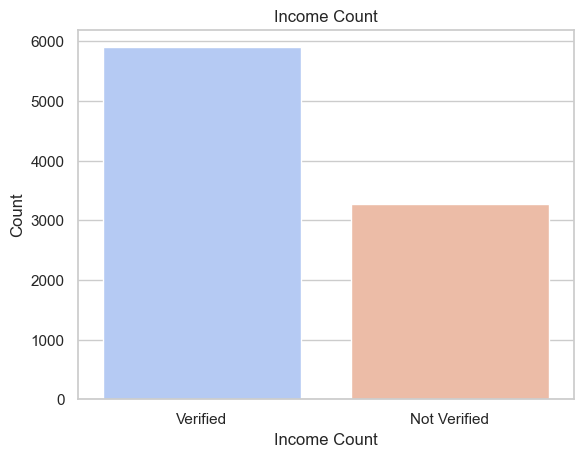

In [33]:
sns.countplot(x='verified_income', data=df,palette='coolwarm')
plt.title('Income Count')
plt.xlabel('Income Count')
plt.ylabel('Count')
plt.show()

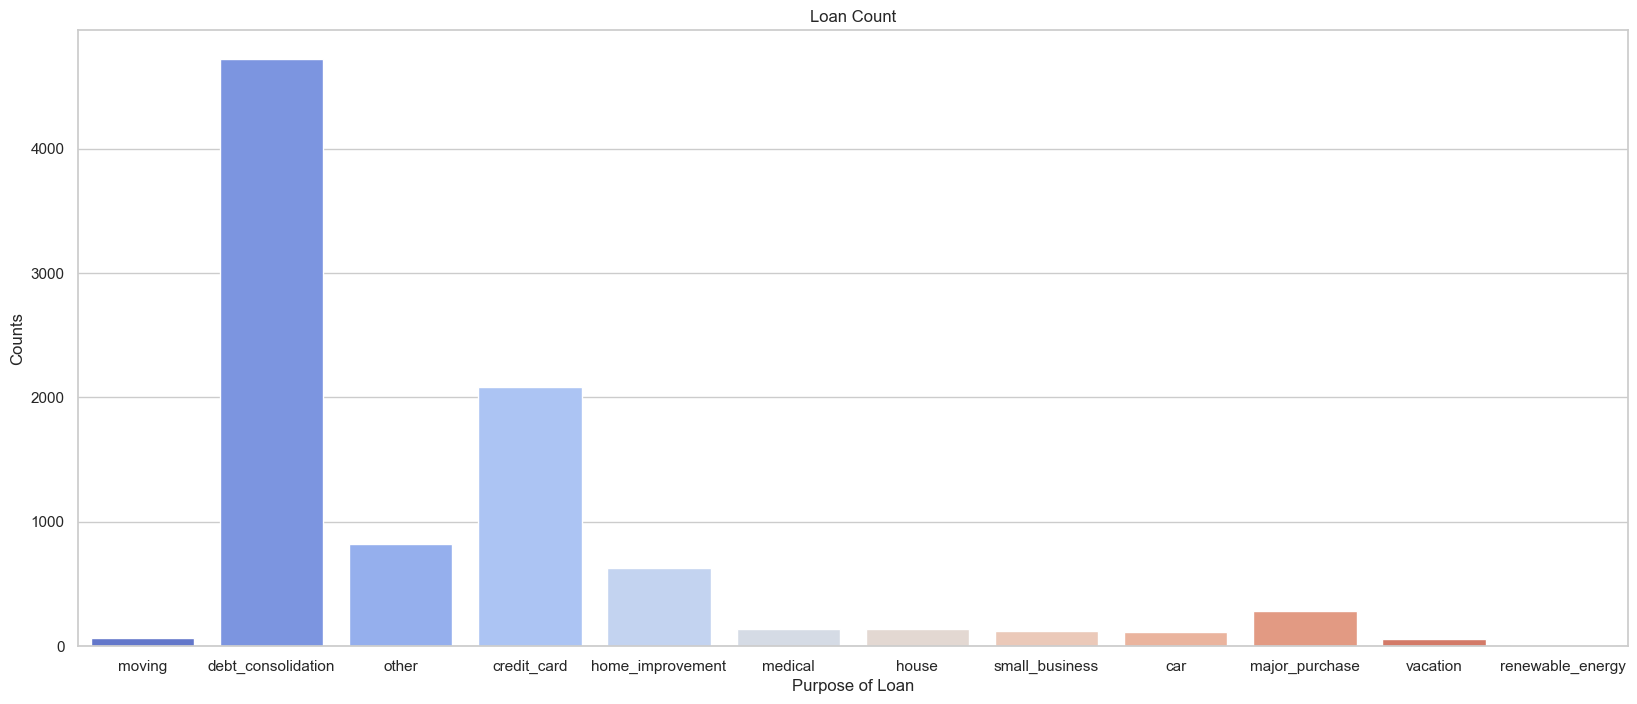

In [34]:
plt.figure(figsize=(20,8))
sns.countplot(x='loan_purpose', data=df,palette='coolwarm')
plt.xlabel('Purpose of Loan')
plt.ylabel('Counts')
plt.title('Loan Count')
plt.show()

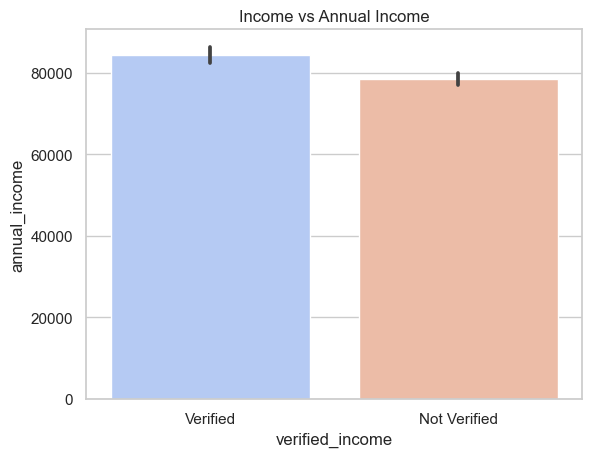

In [35]:
sns.barplot(x='verified_income', y='annual_income', data=df,palette='coolwarm')
plt.title('Income vs Annual Income')
plt.show()

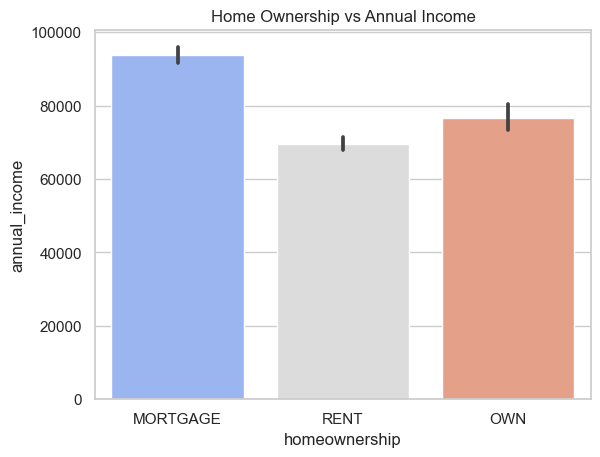

In [36]:
sns.barplot(x='homeownership',y='annual_income',data=df,palette='coolwarm')
plt.title('Home Ownership vs Annual Income')
plt.show()

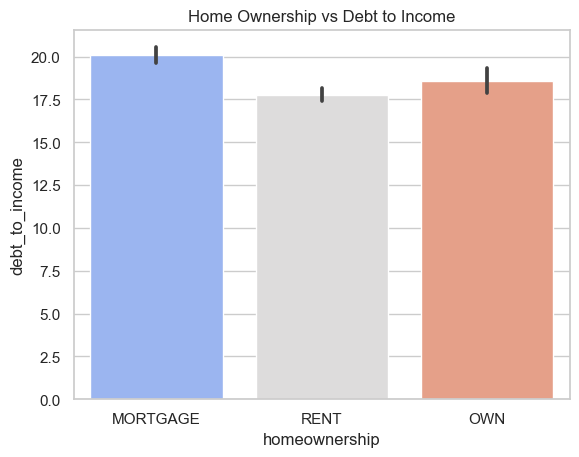

In [37]:
sns.barplot(x='homeownership',y='debt_to_income',data=df,palette='coolwarm')
plt.title('Home Ownership vs Debt to Income')
plt.show()

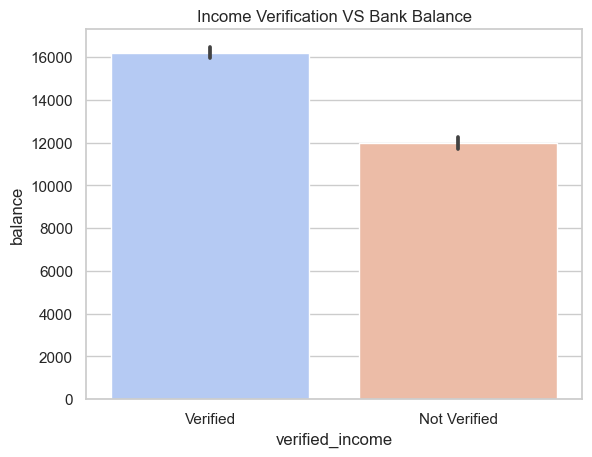

In [38]:
sns.barplot(x='verified_income',y='balance',data=df,palette='coolwarm')
plt.title('Income Verification VS Bank Balance')
plt.show()

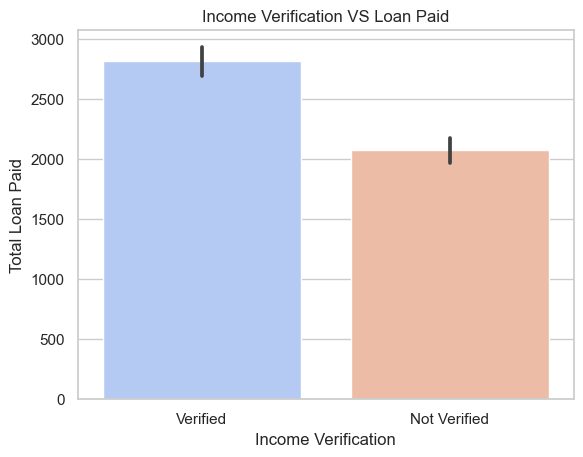

In [39]:
sns.barplot(data=df, x='verified_income',y='paid_total',palette='coolwarm')
plt.xlabel('Income Verification')
plt.ylabel('Total Loan Paid')
plt.title("Income Verification VS Loan Paid")
plt.show()

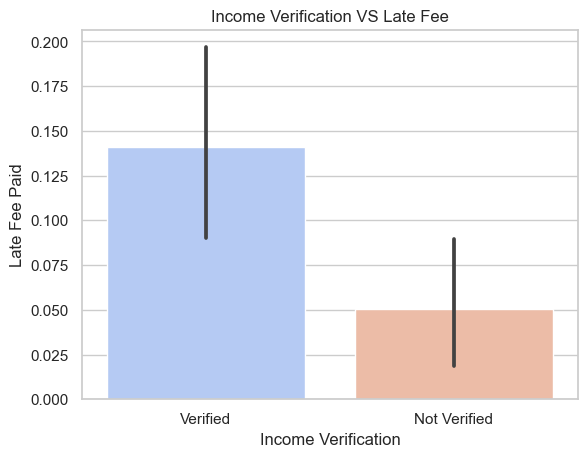

In [40]:
sns.barplot(x='verified_income',y='paid_late_fees',data=df,palette='coolwarm')
plt.xlabel('Income Verification')
plt.ylabel('Late Fee Paid')
plt.title('Income Verification VS Late Fee')
plt.show()

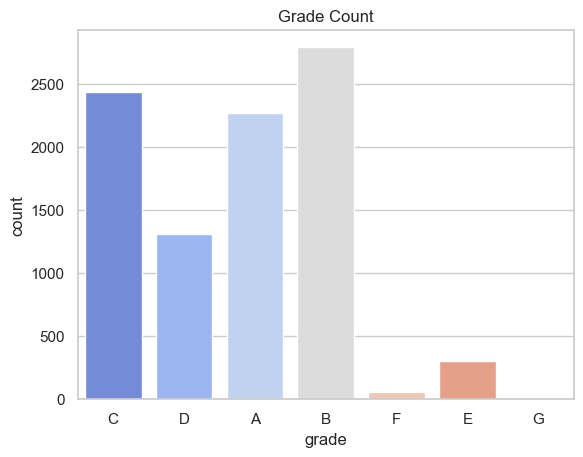

In [41]:
sns.countplot(x='grade',data=df,palette='coolwarm')
plt.title('Grade Count')
plt.show()

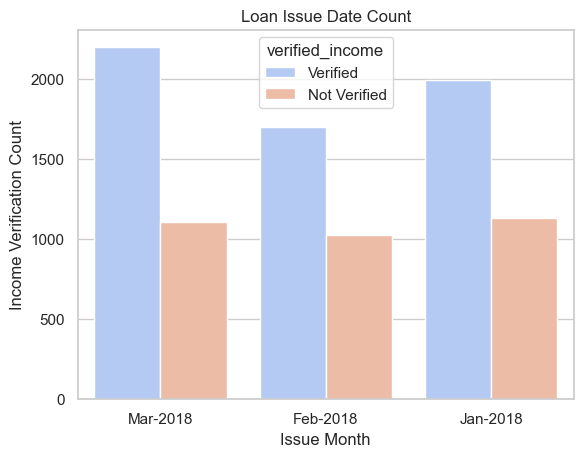

In [42]:
sns.countplot(x='issue_month',hue='verified_income',data=df,palette='coolwarm')
plt.title('Loan Issue Date Count')
plt.xlabel('Issue Month')
plt.ylabel('Income Verification Count')
plt.show()

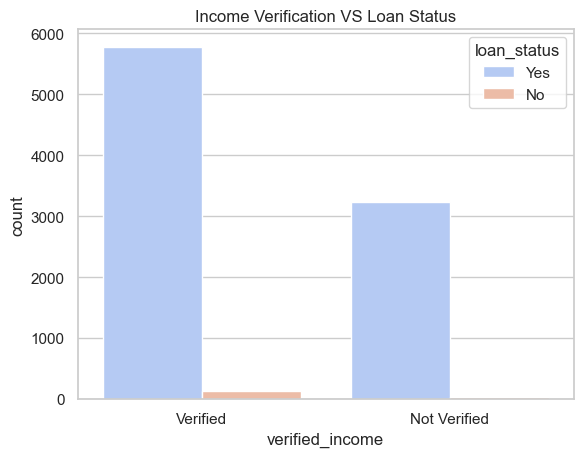

In [43]:
sns.countplot(x='verified_income',hue='loan_status',data=df,palette='coolwarm')
plt.title('Income Verification VS Loan Status')
plt.show()

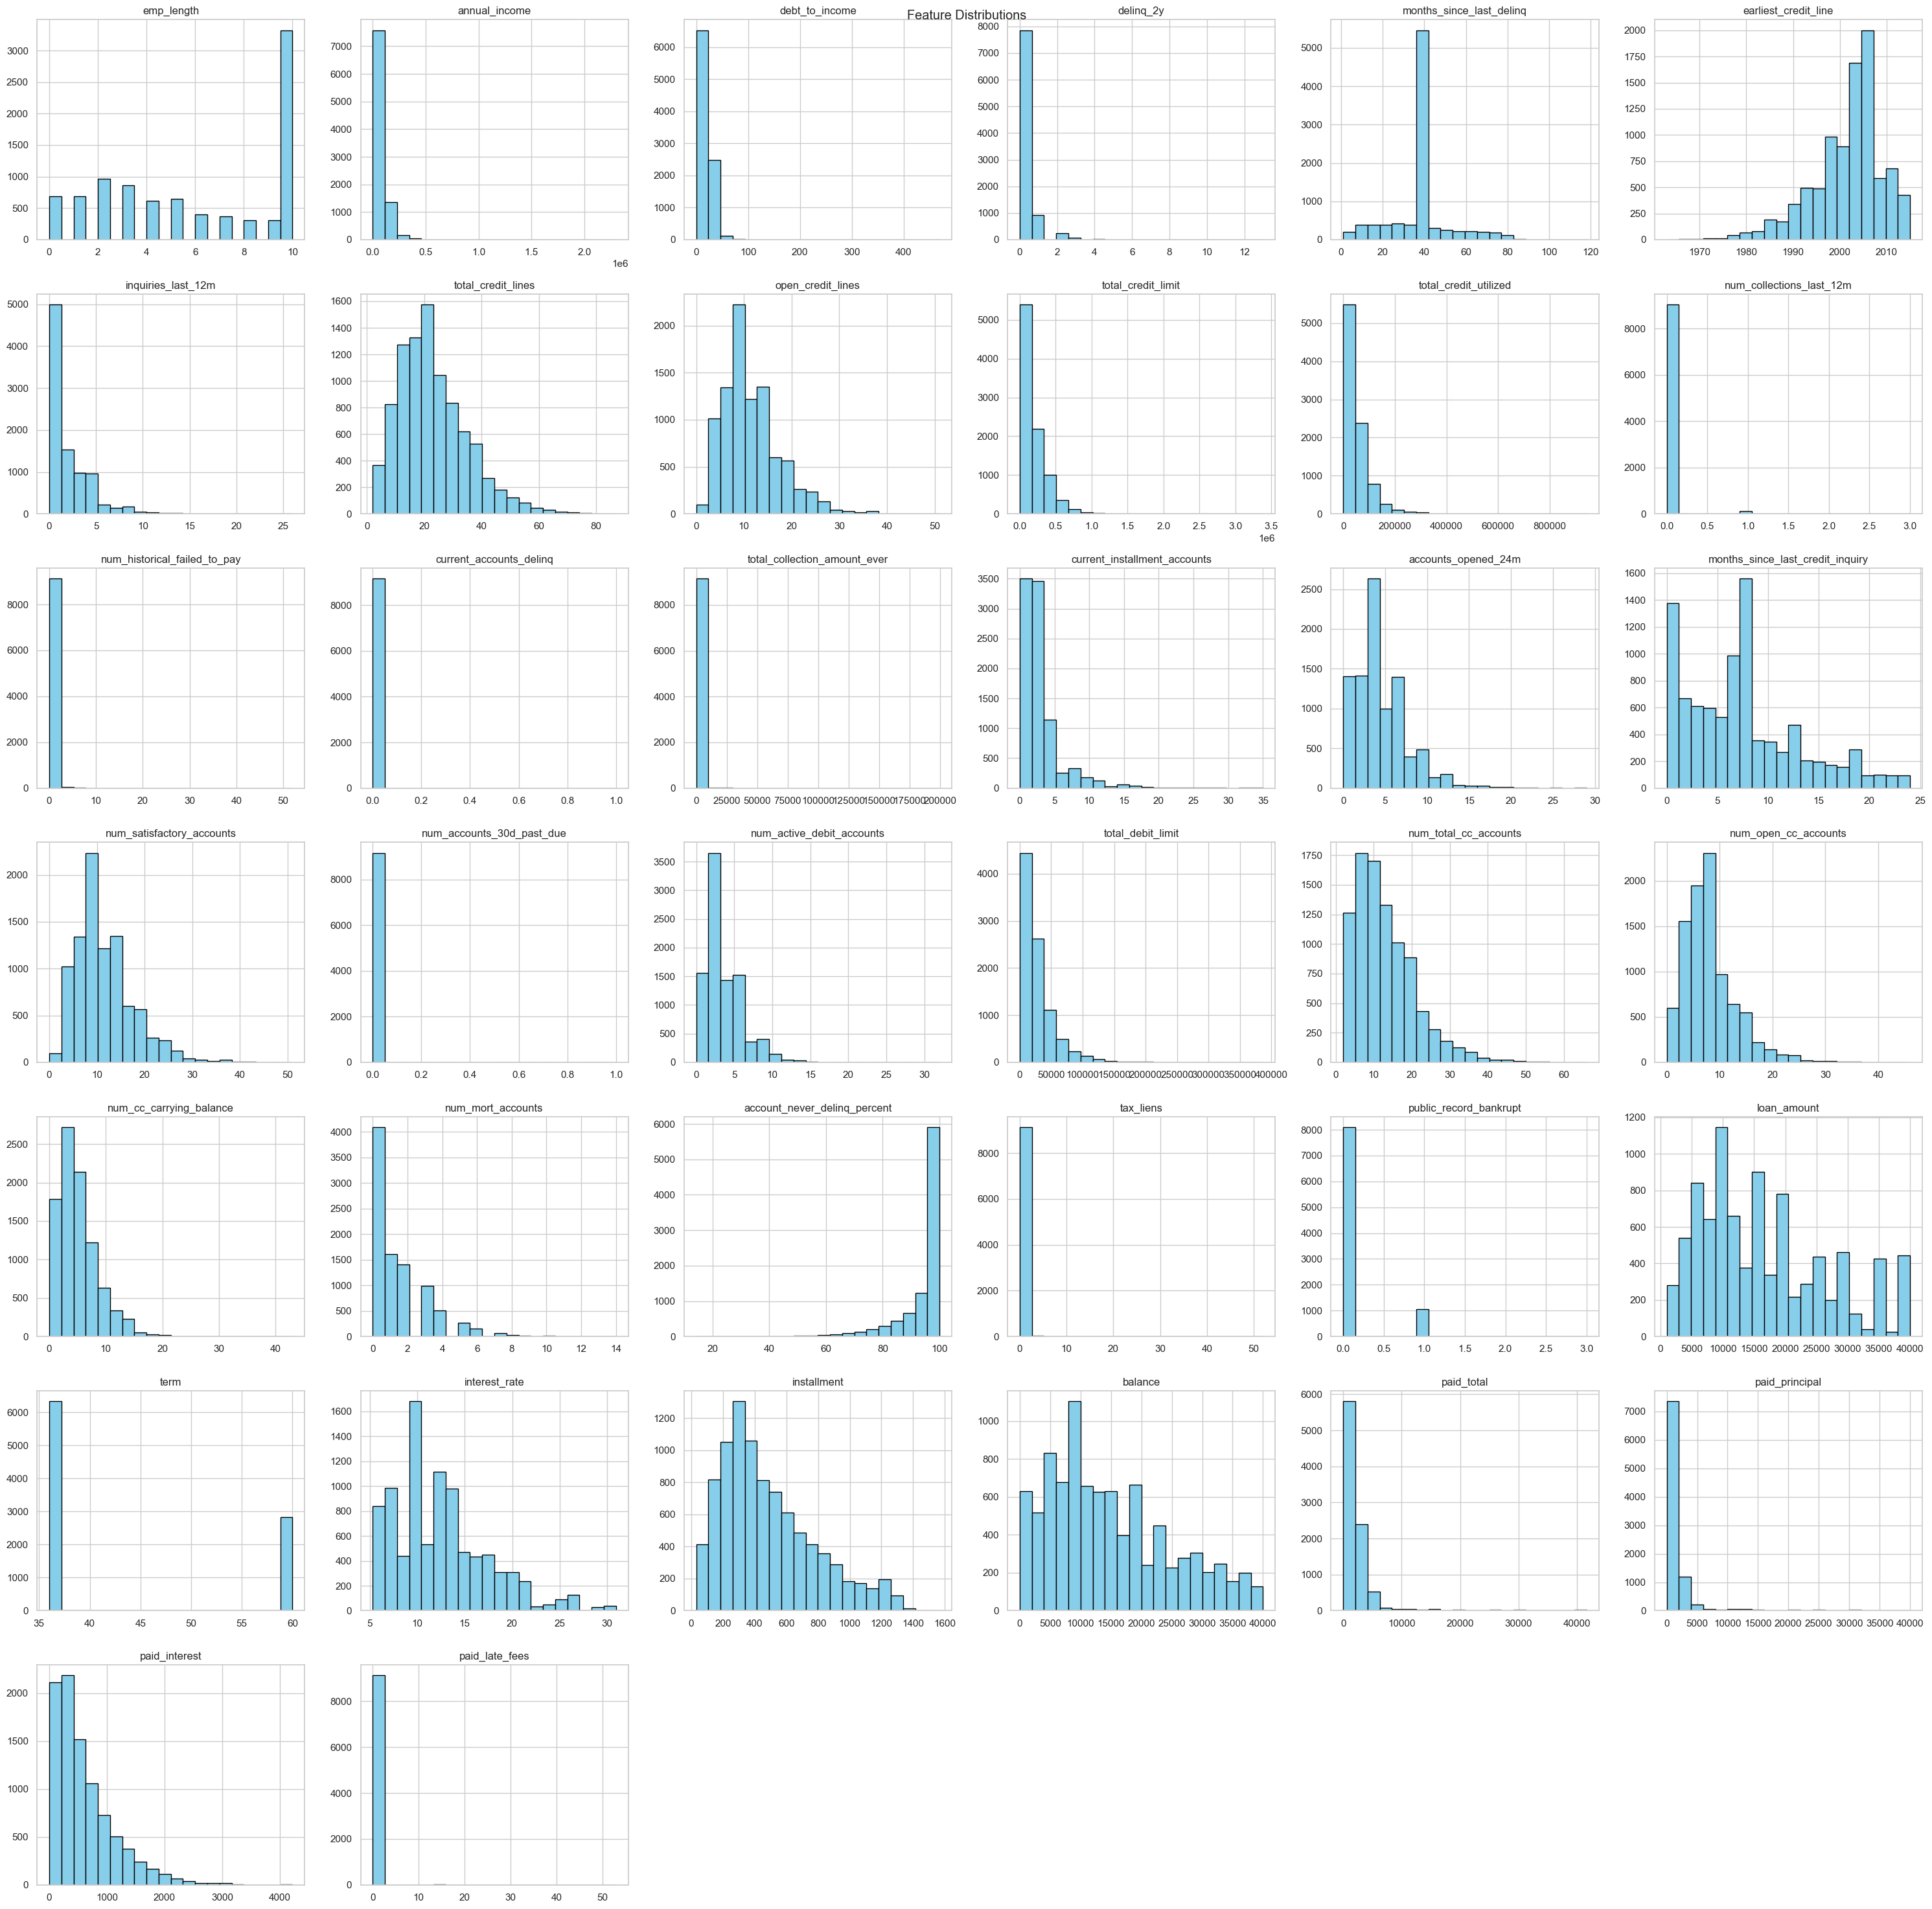

In [44]:
df.hist(figsize=(30, 30), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

In [45]:
c_df=df.copy()

In [46]:
not_change_col=c_df[['loan_status','emp_title','state','sub_grade','issue_month']]

In [47]:
encoder = LabelEncoder()
for col in c_df.select_dtypes(include = ['object']).columns:
    if col not in not_change_col:
        c_df[col] = encoder.fit_transform(c_df[col])

In [48]:
c_df['loan_status'] = c_df['loan_status'].map({'Yes':1,'No':0})

In [49]:
c_df[['loan_status','state','homeownership','verified_income','loan_purpose','application_type','grade','sub_grade','issue_month','loan_status','initial_listing_status','disbursement_method']]

,loan_status,state,homeownership,verified_income,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
0,1,NJ,0,1,7,0,2,C3,Mar-2018,1,1,0
1,1,HI,2,0,2,0,2,C1,Feb-2018,1,1,0
2,1,WI,2,1,8,0,3,D1,Feb-2018,1,0,0
3,1,PA,2,0,2,0,0,A3,Jan-2018,1,1,0
4,1,CA,2,1,1,1,2,C3,Mar-2018,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,TX,2,1,8,0,0,A4,Jan-2018,1,1,0
9996,1,PA,0,1,2,0,3,D3,Feb-2018,1,1,0
9997,1,CT,0,1,2,1,4,E2,Feb-2018,1,0,0
9998,1,WI,0,1,8,0,0,A1,Feb-2018,1,1,0


In [50]:
c_df['loan_status'].value_counts()

loan_status
1    9004
0     163
Name: count, dtype: int64

In [51]:
c_df['loan_status'].value_counts()

loan_status
1    9004
0     163
Name: count, dtype: int64

In [52]:
paid = c_df[c_df['loan_status'] == 1]
not_paid = c_df[c_df['loan_status'] == 0]

In [53]:
paid.shape

(9004, 50)

In [54]:
not_paid.shape

(163, 50)

In [55]:
paid_sample = paid.sample(n=163)
paid_sample.shape 

(163, 50)

In [56]:
concat_df = pd.concat([paid_sample,not_paid],axis=0)
concat_df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
7335,secretary,10.0,NY,2,49623.0,1,25.68,0,36.690512,1997,...,D4,Jan-2018,1,1,0,9297.99,1949.880000,1102.01,847.87,0.00
9568,wealth management advisor,2.0,PA,1,134000.0,1,23.51,0,36.690512,2003,...,C3,Mar-2018,1,0,0,17889.50,1940.590000,1310.50,630.09,0.00
987,edi specialist,0.0,NJ,1,53000.0,1,12.05,0,25.000000,2006,...,B3,Mar-2018,1,1,0,13920.33,1452.050000,1079.67,372.38,0.00
8947,financial analyst,1.0,NY,0,86000.0,1,10.81,0,42.000000,2004,...,A3,Feb-2018,1,1,0,0.00,4065.684919,4000.00,65.68,0.00
5023,driver,7.0,NC,0,60000.0,1,14.26,0,36.690512,2011,...,C5,Feb-2018,1,1,0,12417.55,1236.200000,582.45,653.75,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9602,driver,5.0,GA,0,700000.0,1,1.48,1,23.000000,1968,...,C1,Jan-2018,0,0,0,5078.82,757.830000,521.18,221.65,15.00
9629,sqd leader,10.0,TX,2,78000.0,1,14.38,0,75.000000,2005,...,D2,Feb-2018,0,1,0,14688.62,744.250000,311.38,413.80,19.07
9954,medical assistant,4.0,CA,2,35000.0,1,24.70,0,36.690512,2013,...,D4,Jan-2018,0,1,0,19201.65,2205.830000,798.35,1354.50,52.98
9981,project manager,7.0,KY,0,64000.0,0,36.49,0,36.690512,2002,...,B2,Jan-2018,0,1,0,27089.00,3892.940000,2911.00,981.94,0.00


In [57]:
X =concat_df.drop(columns={'emp_title','state','sub_grade','issue_month','loan_status'})
Y = concat_df['loan_status']

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 7335 to 9984
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_length                        326 non-null    float64
 1   homeownership                     326 non-null    int32  
 2   annual_income                     326 non-null    float64
 3   verified_income                   326 non-null    int32  
 4   debt_to_income                    326 non-null    float64
 5   delinq_2y                         326 non-null    int64  
 6   months_since_last_delinq          326 non-null    float64
 7   earliest_credit_line              326 non-null    int64  
 8   inquiries_last_12m                326 non-null    int64  
 9   total_credit_lines                326 non-null    int64  
 10  open_credit_lines                 326 non-null    int64  
 11  total_credit_limit                326 non-null    int64  
 12  total_cre

In [59]:
Y

7335    1
9568    1
987     1
8947    1
5023    1
       ..
9602    0
9629    0
9954    0
9981    0
9984    0
Name: loan_status, Length: 326, dtype: int64

In [60]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

In [96]:
X_train,X_test,Y_train,Y_test = train_test_split(X_Scaled,Y,test_size= 0.2,stratify=Y,random_state=42)

In [97]:
model = LinearSVC(C=0.1, max_iter=10000)
model.fit(X_train, Y_train)

C:\Users\ok\.conda\New folder\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(C=0.1, max_iter=10000)

In [98]:
X_pred = model.predict(X_train)
X_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [99]:
Y_pred = model.predict(X_test)
Y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [100]:
train_accuracy = accuracy_score(X_pred,Y_train)
train_accuracy

0.8307692307692308

In [101]:
test_accuracy = accuracy_score(Y_pred,Y_test)
test_accuracy

0.6515151515151515

In [102]:
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Precision
precision = precision_score(Y_test, Y_pred)

# F1 Score
f1 = f1_score(Y_test, Y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "F1 Score"],
    "Value": [accuracy, precision, f1,]
})

metrics_df["Value"] = metrics_df["Value"].round(4)
metrics_df

,Metric,Value
0,Accuracy,0.6515
1,Precision,0.6471
2,F1 Score,0.6567


In [103]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
conf_matrix

array([[21, 12],
       [11, 22]], dtype=int64)